# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     691.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.97e-38
Time:                        19:08:16   Log-Likelihood:                -7.2038
No. Observations:                  50   AIC:                             22.41
Df Residuals:                      46   BIC:                             30.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9703      0.099     50.048      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.49911367  4.97454075  5.41098208  5.78110501  6.06744112  6.26525619
  6.38332805  6.44250439  6.47227755  6.50593902  6.57510971  6.70454477
  6.90806636  7.18629271  7.52653656  7.90488962  8.29015066  8.64895175
  8.95124057  9.17521785  9.31091899  9.36185118  9.3444172   9.28522048
  9.21669423  9.17177274  9.17848041  9.25532739  9.40826841  9.62972447
  9.899828   10.18968709 10.4661323  10.69716638 10.85722124 10.93135878
 10.91772514 10.82785531 10.68477794 10.51923183 10.3646156  10.25150038
 10.20260713 10.22907358 10.32862434 10.48594478 10.67519715 10.86426566
 11.020033   11.11382144]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.11663494 10.98762374 10.74645574 10.43795156 10.12111094  9.85466749
  9.68270871  9.62388178  9.66682812  9.77296434]


## Plot comparison

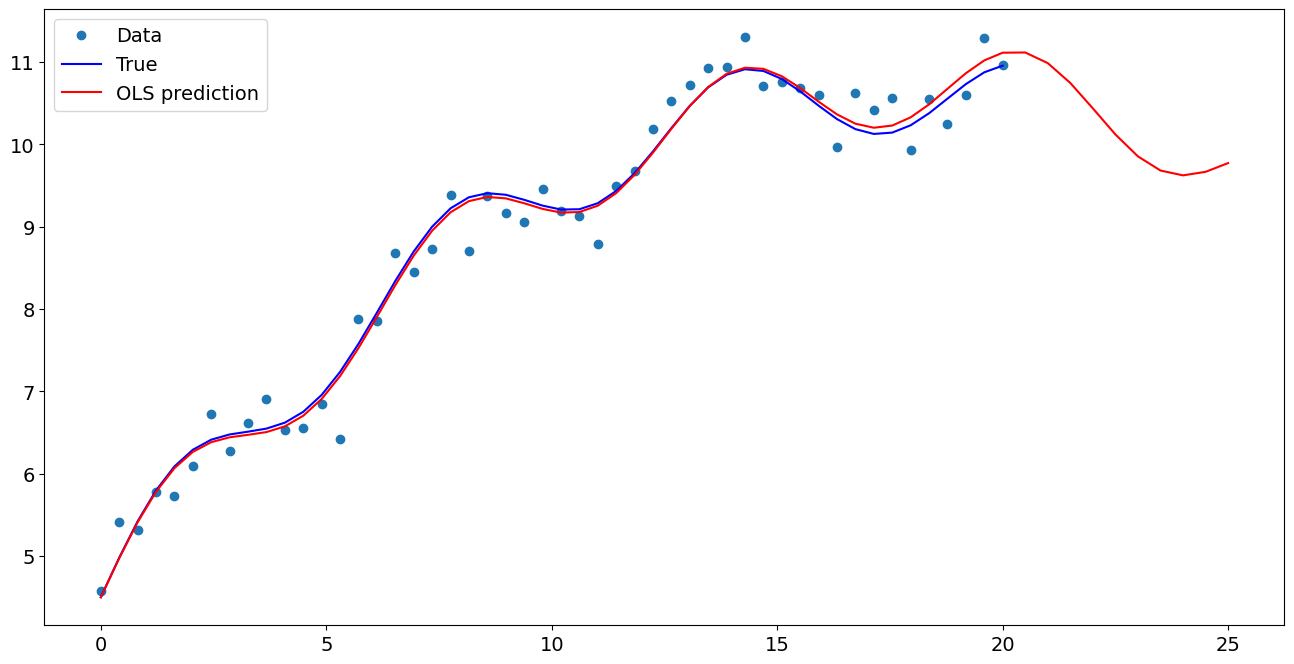

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.970279
x1                  0.496308
np.sin(x1)          0.501524
I((x1 - 5) ** 2)   -0.018847
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.116635
1    10.987624
2    10.746456
3    10.437952
4    10.121111
5     9.854667
6     9.682709
7     9.623882
8     9.666828
9     9.772964
dtype: float64